In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
from boutdata.data import BoutData
import os, sys
import matplotlib

import matplotlib.pyplot as plt
import xbout
import pandas as pd
import numpy as np
import xarray as xr

from boutdata.restart import addvar
import glob
import shutil
import scipy

sys.path.append(r"/home/mike/work/sdtools")


from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.neutral_transport import NeutralTransport
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.balance1d import *
# from code_comparison.code_comparison import *

%load_ext autoreload
%autoreload 2

## Read Hermes-3

In [4]:
db = CaseDB(
    case_dir = r"/home/mike/work/cases",
    grid_dir = r"/home/mike/work/cases"
)

toload = [ 
    dict(name="master-26nov", id="m2ubisect_m9a-e02725-master26nov", unnormalise_geom = True, use_xhermes = True, squash = True), 
    dict(name="master-old", id="m2ubisect_m9a-master_from_m9bb", unnormalise_geom = True, use_xhermes = True, squash = True), 
]
cs = {}
for case in toload:
    cs[case["name"]] = db.load_case_2D(case["id"], use_squash = case["squash"], verbose = True)
    cs[case["name"]].extract_2d_tokamak_geometry()


/home/mike/work/boutdata/src/boutdata/data.py:761: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: [Errno 2] No such file or directory: '"mu1af6-tunepuff.nc"'
Evaluating non-scalar options not available
  alwayswarn(


- Reading case m2ubisect_m9a-e02725-master26nov
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...
- Done

Unnormalising with xHermes
- Reading case m2ubisect_m9a-master_from_m9bb
-----------------------
- Looking for squash file
- Squashoutput file not found, creating...


/home/mike/work/boutdata/src/boutdata/data.py:761: AlwaysWarning: While building x, y, z coordinate arrays, an exception occured: [Errno 2] No such file or directory: '"mu1af6-tunepuff.nc"'
Evaluating non-scalar options not available
  alwayswarn(


- Done

Unnormalising with xHermes


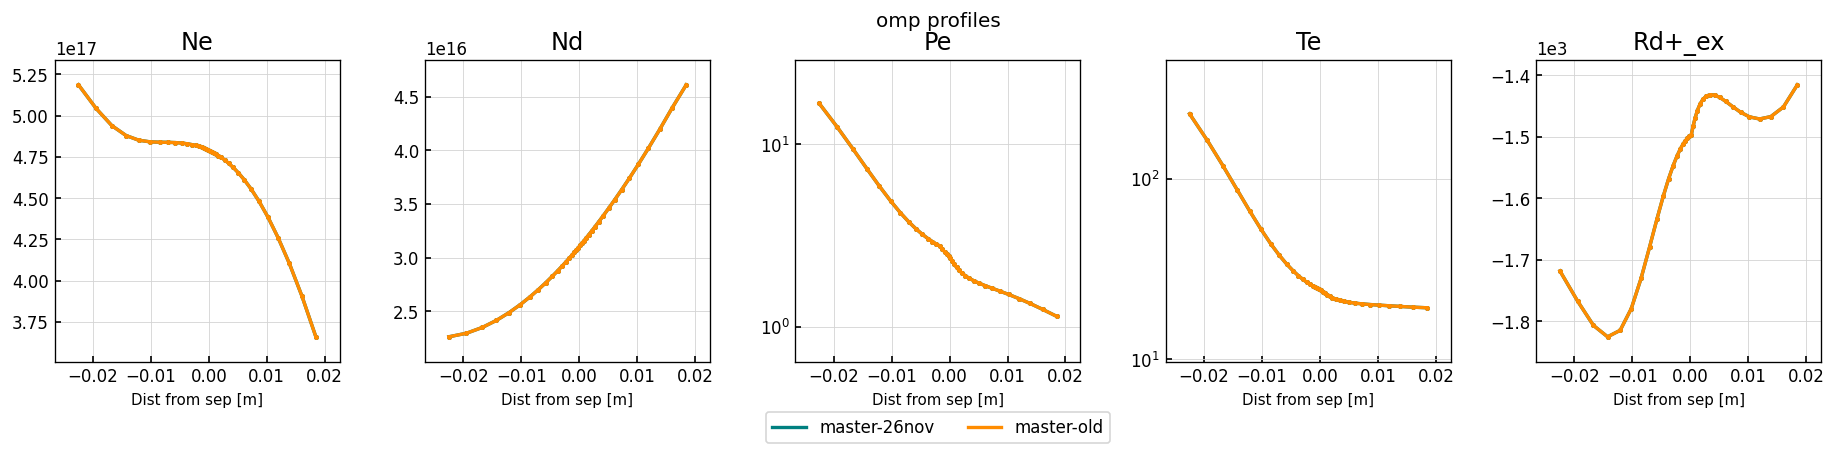

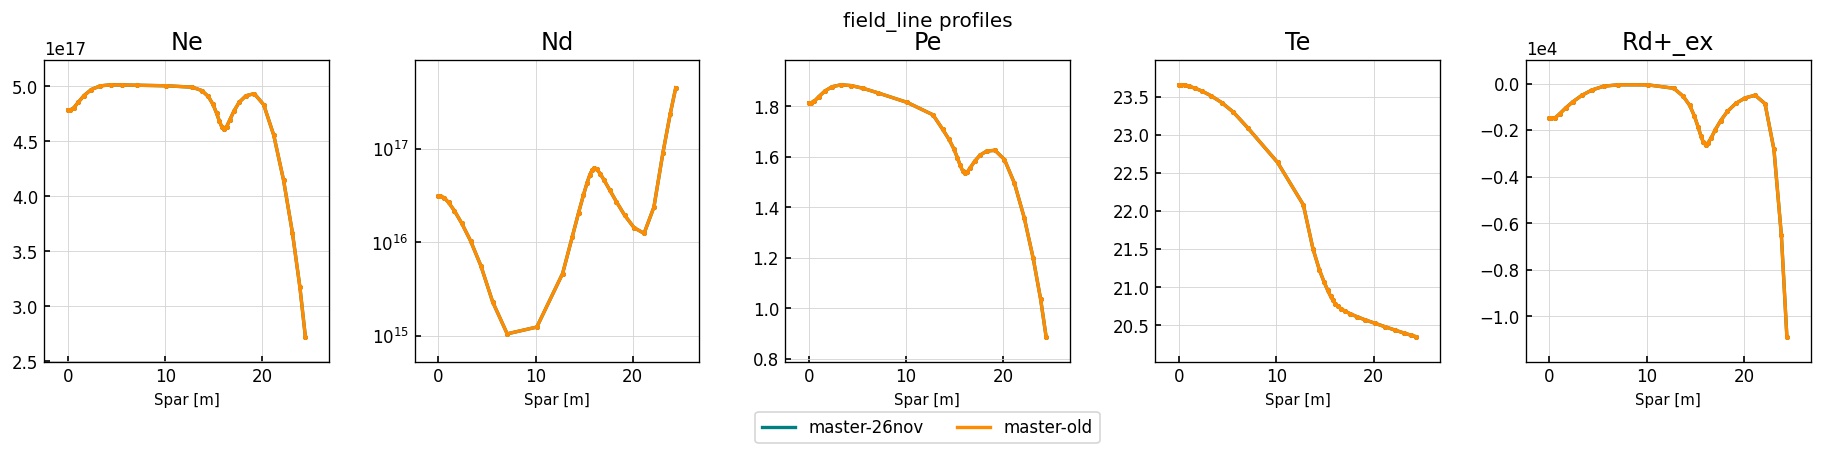

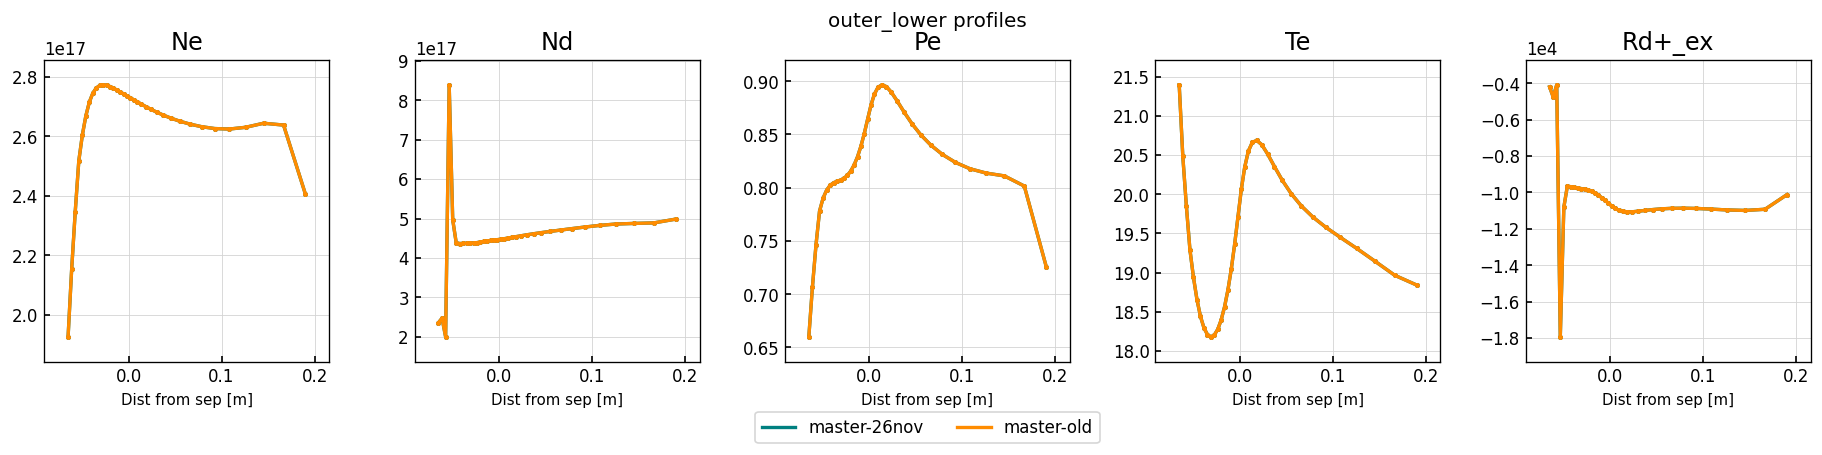

In [6]:
toplot = {}

for case in cs:
    toplot[case] = cs[case].ds.isel(t=-1)
    
lineplot(
    toplot,
    params = ["Ne", "Nd", "Pe","Te", "Rd+_ex"],
    regions = ["omp", "field_line", "outer_lower"],
)